In [1]:
# Import standard libraries
import numpy as np
from time import time
import matplotlib.pyplot as plt

# Local modules
from forestfire import ForestFire
from analysis import *

# Create output directory if it does not exist
from pathlib import Path
Path('animations').mkdir(parents=True, exist_ok=True)
Path('plots').mkdir(parents=True, exist_ok=True)

Time elapsed: 295.85 seconds
[7860.17889642   69.35739469] [222.76783227  75.67566266]


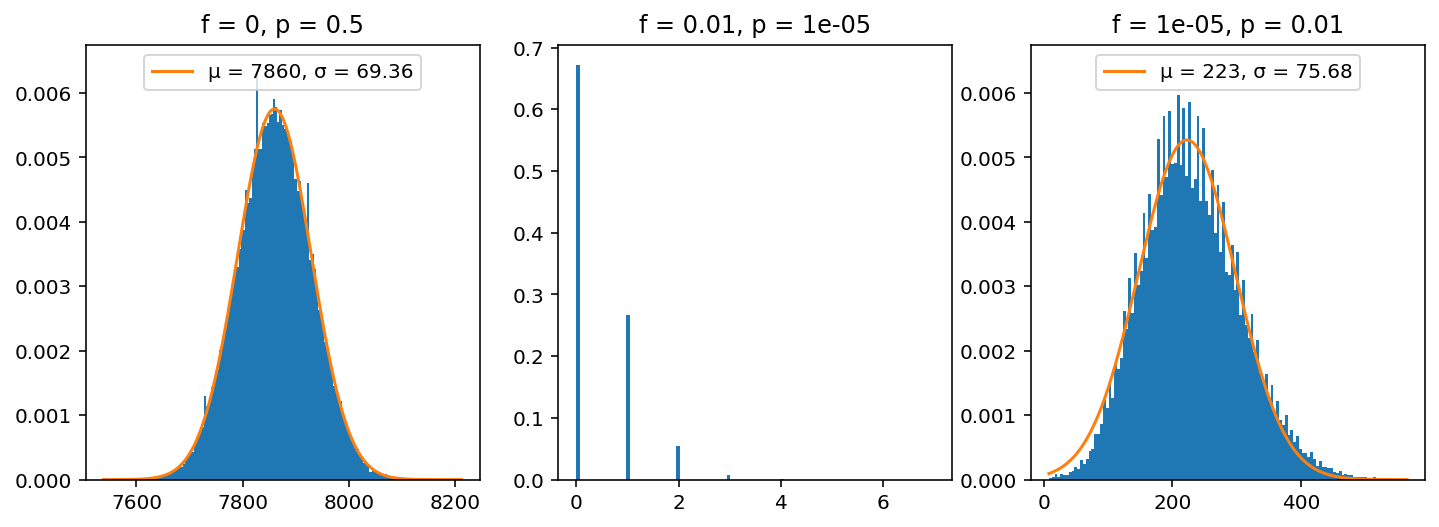

In [3]:
L = 200
forest1 = ForestFire([L,L], 0, 0.5, spark=True)
l = 0.01
forest2 = ForestFire([L,L], l, l/1000, spark=False)
forest3 = ForestFire([L,L], l/1000, l, spark=False)
t = [10000, 10000, 10000]
N = 100000
popt1, popt3 = plot_firesizepd_multi(forest1, forest2, forest3, t, N)
print(popt1, popt3)

In [ ]:
L = 200
forest = ForestFire([L,L], 0, 0.5, spark=True)
forest.step(10000)
animate_forest(forest, interval=100, frames=200, name='forestfire_a.gif')

L = 200
forest = ForestFire([L,L], 0.01, 0.01/1000, spark=True)
forest.step(10000)
animate_forest(forest, interval=100, frames=200, name='forestfire_b.gif')

L = 200
forest = ForestFire([L,L], 0.01/1000, 0.01, spark=True)
forest.step(10000)
animate_forest(forest, interval=100, frames=200, name='forestfire_c.gif')

In [ ]:
L = 200
forest = ForestFire([L,L], 0, 0.5, spark=True)
forest.step(12000)
plt.hist(forest.w_history, density=True, bins='auto')

In [ ]:
L = 200
forest1 = ForestFire([L,L], 0, 0.5, spark=True, trackw=True)
l = 0.01
forest2 = ForestFire([L,L], l, l/1000, spark=False, trackw=True)
forest3 = ForestFire([L,L], l/1000, l, spark=False, trackw=True)
plot_waitingtimespd_multi(forest1, forest2, forest3, t=2000, N=1000)

In [ ]:
L = 200
f = 0.001
p = 0.001
forest = ForestFire([L,L], f, p, spark=True)
plot_fractionvt(forest, 1000000, plot_green=True)
t = 990000
print(np.mean(forest.s_history[t:])/forest.size, np.mean(forest.g_history[t:])/forest.size)
print(calc_steadystate(f, p))